In [14]:
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import datetime as dt
import time
import json
from pyspark.sql import SQLContext
import json
from IPython import display
from IPython.core.display import HTML
import pandas
import time 
import numpy as np
import matplotlib.pyplot as plt 
from pyspark.sql.functions import split, explode, col

sql = SQLContext(sc)

In [15]:
lol = sql.read.load(format = "au.com.d2dcrc.carbon.spark.tweets", startTime = "2016-10-09T11:00:00Z", endTime = "2016-10-09T11:10:00Z")
lol.printSchema()


displaytweets = lol.select( "author", "publicationTime", "bodyText", "locations").orderBy("author")
pd.set_option('display.max_colwidth', 500)
display.display(displaytweets.toPandas())

root
 |-- key:salt: byte (nullable = true)
 |-- key:timestamp: timestamp (nullable = true)
 |-- key:id: string (nullable = true)
 |-- key:subIds: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- data: string (nullable = true)
 |-- reference: string (nullable = true)
 |-- format: string (nullable = true)
 |-- type: string (nullable = true)
 |-- source: string (nullable = true)
 |-- ingestTime: timestamp (nullable = true)
 |-- author: string (nullable = true)
 |-- civilEvents: string (nullable = true)
 |-- locations: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- nlp: string (nullable = true)
 |-- publicationTime: timestamp (nullable = true)
 |-- politicalParty: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- times: string (nullable = true)
 |-- bodyText: string (nullable = true)
 |-- title: string (nullable = true)
 |-- phraseList: string (nullable = true)



,author,publicationTime,bodyText,locations
0,id:twitter.com:1000640708,2016-10-09 21:38:56,None,None
1,id:twitter.com:1000881960,2016-10-09 21:38:06,None,None
2,id:twitter.com:1001005442,2016-10-09 21:36:09,None,None
3,id:twitter.com:1002878328,2016-10-09 21:37:29,None,None
4,id:twitter.com:1004220360,2016-10-09 21:30:33,None,None
5,id:twitter.com:1004332231,2016-10-09 21:31:36,None,None
6,id:twitter.com:1004332231,2016-10-09 21:31:04,None,None
7,id:twitter.com:1004332231,2016-10-09 21:31:01,None,None
8,id:twitter.com:1004332231,2016-10-09 21:31:14,None,None
9,id:twitter.com:1004332231,2016-10-09 21:31:45,None,None


In [16]:
def get_tweets(df):
    #return rows from dadtframe
    return df.map(lambda row: row.data)

In [17]:
def get_jason(data):
    #returns a pyspark.rdd.PipelinedRDD of jason data
    return data.map(lambda data: json.loads(data))


In [18]:

def get_tweet_body(data):
    #returns a pyspark.rdd.PipelinedRDD of tweet bodies
    tweet_bodies = data.map(lambda tweet_as_json: tweet_as_json.get('body'))
    return tweet_bodies 

In [19]:
#This function obtains geo tag details from json tweets
#input: json data
#output: returns a pyspark.rdd.PipelinedRDD of tweet bodies
def get_tweet_geo(data):
    tweet_geo = data.map(lambda tweet_as_json: tweet_as_json.get('geo',"none"))
    return tweet_geo

In [20]:
def get_tweet_BodyLocation(data):
    bodys_with_location = data.filter(lambda line: 'location' in line).map(lambda line: (line.get('location', "none"),line.get('body',"none")))
    return bodys_with_location

In [21]:
def get_hashtags(jdata):
    hash_tags = jdata.flatMap(lambda line: line.split(" ")).filter(lambda word: word.startswith('#'))
    return hash_tags 

In [22]:
def hashtag_counter(htags):
    hashtag_counts = htags.map(lambda hashtag: (hashtag, 1)).reduceByKey(lambda a, b: a + b)
    return hashtag_counts

In [23]:
#this fuction returns a given number of common hashtags
#inputs: list of hashtags or hashtag counter dictionary
#output: list of common hashtags 
def common_hashtags(htags,n):
    return Counter(dict(htags)).most_common(n)

In [24]:
#this fuction takes a dictionary and plots key value pairs
def plot_bargraph(d):
    %matplotlib inline
    plt.bar(range(len(d)), d.values(), align="center")
    plt.xticks(range(len(d)), list(d.keys()),rotation='vertical')
    plt.show()

In [25]:
#df = get_data() #get twitter data for a given number of minutes

df = lol
test =get_tweets(df)
test= get_jason(test)
test=get_tweet_body(test)
hashTags = get_hashtags(test)
hashtag_counts = hashtag_counter(hashTags)

In [26]:
hashtag_count_list = hashtag_counts.take(500)

In [27]:
#Ten common hashtags 
common_10 = common_hashtags(hashtag_count_list,30) 
print(common_10)

[('#auspol', 98), ('#LIVE', 17), ('#dancehall', 16), ('#GOT7', 16), ('#afrotrap', 16), ('#SEVENTEEN', 16), ('#xfactorau', 15), ('#election2016', 13), ('#HousefulLionHeart', 9), ('#Kurds,', 9), ('#우현', 8), ('#Trump', 8), ('#tcot', 7), ('#wonwoo', 7), ('#EU', 6), ('#latest', 6), ('#Saudi', 6), ('#survivorau', 6), ('#VIDEO', 6), ('#startup', 6), ('#MoreElectableThanT…', 6), ('#UVIndex', 5), ('#Poland', 5), ('#amwriting', 5), ('#마크', 5), ('#terror', 5), ('#Leeds', 5), ('#No2Rouhani', 5), ('#Trump2016', 4), ('#LootT…', 4)]


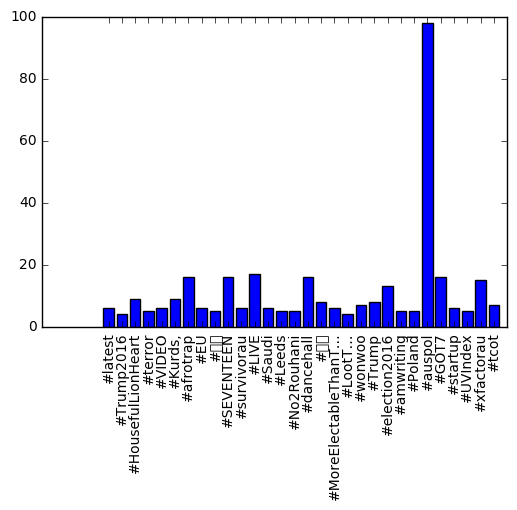

In [28]:
plot_bargraph(dict(common_10))

# Futher Analysis:

# Hashtags and Locations


In [29]:
#This function will extract the text of hashtag from gnip hashtag dictionary
#input: gnip hashtag dictionaries
#output: list of hashtag text
def extract_hashtag(hashtag_list):
    hashtags = list()
    
    for hashtag in hashtag_list:
        text = hashtag.get('text').lower()
        if text is not None:
            hashtags.append(text)
        
    return hashtags

#This function extracts the location and hashtag details for each tweet
#input: dataframe loaded from the server
#output: retuns a rdd containing location and hashtags for each location
def get_twitter_details(df):
    tweetTest = df.map(lambda row: row.data).map(lambda data: json.loads(data)).filter(lambda line: 'location' in line)\
    .map(lambda line: (line['location']['name'],line['twitter_entities']['hashtags']))\
    .map(lambda line_tuple: (line_tuple[0], extract_hashtag(line_tuple[1])))
    return tweetTest
#['country_code']

In [30]:
# creates a dataframe from extracted twitter details (location and hashtag)
#input: rdd with list of hashtags for each location  
#output: returns a spark dataframe for each hashtag with location
def create_sparkDF(rdd):
    sparkDF = sqlContext.createDataFrame(rdd,['location','hashtags'])
    sparkDF = sparkDF.select('location',explode(sparkDF.hashtags).alias("aHash"))
    return sparkDF

In [31]:
def top_10_hashes(loc,dataframe):
    dataframe.registerTempTable("hashtagTable")
    top10_for_location = sqlContext.sql("SELECT aHash as hashtag, count FROM \
                            (SELECT location, aHash,count(*) as count \
                            FROM hashtagTable GROUP BY location,aHash ORDER BY count DESC) as t \
                            WHERE t.location='"+loc+"' LIMIT 10")
    return top10_for_location

In [32]:
def top10_hashtags(sparkdf):
    sparkdf.registerTempTable("eventTable")
    #sqlContext.sql("SELECT location, anHash AS 'Hash',COUNT(*) FROM eventTable GROUP BY location").show()
    top10DF = sqlContext.sql("SELECT location, aHash,count(*) as count FROM eventTable GROUP BY location,aHash ORDER BY count DESC LIMIT 10")
    return top10DF

In [35]:
#input: Number of hours tweetes are considered. 
#Will be considering tweets before n number of hours from current time
def hashtag_main(lol):
    df = lol
    rddData = get_twitter_details(df)
    spDF = create_sparkDF(rddData)
    top10_spDF=top10_hashtags(spDF)
    top10_spDF.show()
#    
  #df = lol
#test =get_tweets(df)
#test= get_jason(test)
#test=get_tweet_body(test)
#hashTags = get_hashtags(test)
#hashtag_counts = hashtag_counter(hashTags)


In [36]:
hashtag_main(lol) #number of hashtags and location for the specified period of time

+----------+--------------------+-----+
|  location|               aHash|count|
+----------+--------------------+-----+
|  Adelaide|ariastwentyonepilots|    6|
| Traralgon|       themjcastep41|    5|
|  Brisbane|              quotes|    3|
|  Brisbane|          positivity|    3|
|  Brisbane|thinkbigsundaywit...|    3|
|  Brisbane|       inspirational|    3|
|    Sydney|              sydney|    3|
|    Sydney|             twitter|    2|
|Gold Coast|              auspol|    2|
|    Sydney|           cubevenue|    2|
+----------+--------------------+-----+



In [68]:
def top10_perlocation(lol,city):
    df = lol #load twitter data
    #hash_rdd = get_twitter_hash_location(df)
    hash_rdd = get_twitter_details(df)
    sparkdf = create_sparkDF(hash_rdd)
    top10_spark = top_10_hashes(city,sparkdf)
    top10_Panda = top10_spark.toPandas()
    %matplotlib inline
    top10_Panda.plot(x="hashtag",kind='barh',color='green',title='Top 10 hashtags for '+city+' for the time period',legend=False)
    plt.xlabel("count")
    plt.ylabel("HashTag#")

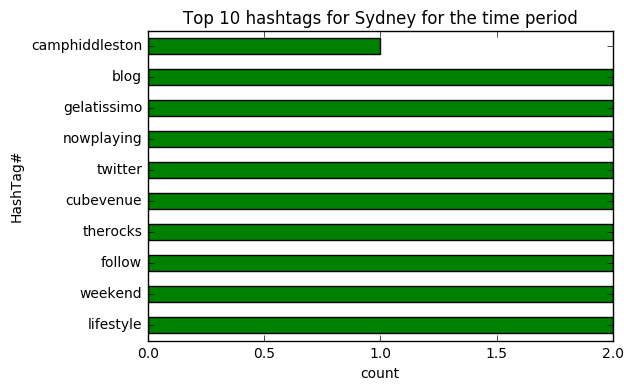

In [69]:
top10_perlocation(lol,'Sydney') # top 10 hashtags in Sydney for the past 

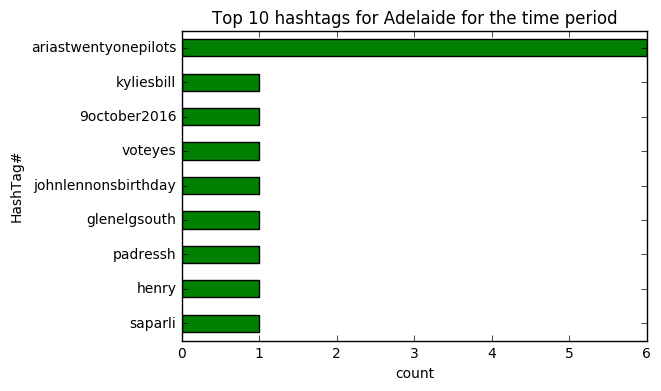

In [70]:
top10_perlocation(lol,'Adelaide') # top 10 hashtags in Adelaide for the past 

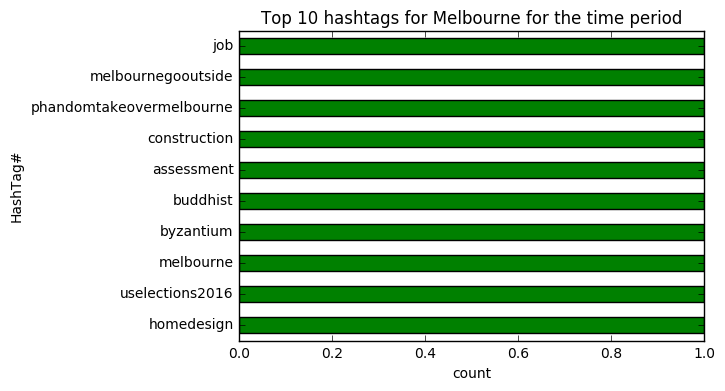

In [71]:
top10_perlocation(lol,'Melbourne') # top 10 hashtags in Melbourne 